## **Customer Personality Analysis using a public dataset.**

**First of all**, I'd like to share with you a website that you can use to practice your analysis skills:
https://www.kaggle.com/datasets
Here you'll find all kind of datasets and you can choose what you like best. I work with people, and I need to understend more and more about they behavior, that's why almost all of my projects will be related to clients.

Let's begin:
I'll use this dataset:
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

**Remember**, I want you to have the way of thinking of a Business Analyst. So, BEFORE you start applaying all the tools you know, think: What do I want to find in this data? What is my goal? If you want to be a business person, it's essential that you develop the reasoning of "Why Before How".

We will create the questions together during this project, we will start here with the first one:

### **First question**:
**What is Customer Personality, and why's that important?**

Ideally, a dataset with the customer personality have the informations about the company's type, all kind of customer. With this database you can find what would be the "ideal customer". That is, that type of customer that's worth investing in to retain, or to acquire a new one. REMEMBER: if you work in a company, you know that our resoruces are limited, that means, you don't have infinity money to invest in every type of customer. Ok, so, let's find the "PERFECT CLIENT" to our company.

In [3]:
#Importing Libraries
import pandas as pd                                    #This is the main data analysis library. We use the "as pd" as a shortcut to the librarie
import matplotlib.pyplot as plt                        #I'll use matplotlib to visualize some graphs. Shortcut plt
import seaborn as sns                                  #Seaborn is a library for making statistical graphics in Python. Shortcut sns
import numpy as np                                     #Numpy is the best performing numeric library. Shortcut np. Please, read: https://medium.com/@vitor.yagocp/data-analyst-journey-3-why-numpy-49a68dc442f1
#Sklearn is an efficient tool for predective data analysis that provides dozens of built-in machine learning algorithms and models, called estimators
from sklearn.impute import KNNImputer                  #https://scikit-learn.org/stable/modules/impute.html#knnimpute
from sklearn.cluster import KMeans                     #https://scikit-learn.org/stable/modules/clustering.html#k-means
from sklearn.decomposition import PCA                  #https://scikit-learn.org/stable/modules/decomposition.html#pca
from collections import Counter                        #dict subclass for counting hashable objects


In [4]:
#Selecting the database

dataframe = pd.read_csv("marketing_campaign.csv", sep='\t')
dataframe.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### **Second question:**

**What kind of data do I have? What does each column mean? Are all these columns useful?**

This group of question should always appear after the first large group that has already been done before. So, now, we can understand what we really need befor starting the analysis.

#### **Information of each column:**
Remember that: This information was provided in the case, and in your company you would also have the meaning of each column.


*ID:* Customer's identifier (don't confuse it with the line number).

*Year_Birth:* Customer's birth year.

*Education:* Customer's high level education.

*Martial_Status:* Last martial status informed by the customer.

*Income:* Last yearly income reported by the customer.

*Kidhome:* Number of the children in the customer's house

*Teenhome:* Number of teenagers in customer's house

*Dt_Customer:* Date of customer's enrollment

*Recency:* Number of days since customer's last purchase

*Complain:* 1 if the customer complained in the last 2 years, 0 otherwise

*MntWines:* Amount spent on wine in last 2 years

*MntFruits:* Amount spent on fruits in last 2 years

*MntMeatProducts:* Amount spent on meat in last 2 years

M*ntFishProducts:* Amount spent on fish in last 2 years

*MntSweetProducts:* Amount spent on sweets in last 2 years

*MntGoldProds:* Amount spent on gold in last 2 years

*NumDealsPurchases:* Number of purchases made with a discount

*AcceptedCmp1:* 1 if customer accepted the offer in the 1st campaign, 0 otherwise

*AcceptedCmp2:* 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

*AcceptedCmp3:* 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

*AcceptedCmp4:* 1 if customer accepted the offer in the 4th campaign, 0 otherwise

*AcceptedCmp5:* 1 if customer accepted the offer in the 5th campaign, 0 otherwise

*Response:* 1 if customer accepted the offer in the last campaign, 0 otherwise

*NumWebPurchases:* Number of purchases made through the company’s website

*NumCatalogPurchases:* Number of purchases made using a catalogue

*NumStorePurchases:* Number of purchases made directly in stores

*NumWebVisitsMonth:* Number of visits to company’s website in the last month

In [5]:
#Let's see all of kind of variables that we have on the dataframe:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

As we can see, there's some rows in the Income column with 24 NULL infos, this could mean that the person is not employed

In [6]:
#Now, let's see some more information about the columns
print(dataframe.nunique())

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


As we can see, the columns "Z_CostContact" and "Z_Revenue" have only one value, this means that these columns will not be relevant in the analysis, as the value does not change in any of the 2240 customers. So, we can drop this columns

In [7]:
 #The "drop" function is used to take out rows or columns from the dataset. You can see more on: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html 
dataframe.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
dataframe.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### **Third Question?**

There's some correlation between the columns? If yes, how can we easily see this? What to do with the information that is in text format?

I like these questions because we need to think beyond what the analysis tools offer us. For exemple, I belive that the martial status can provide us some valuabole information about the customer's consumation profile, but, how can we pass this information to the code? The code will only be able to correlate numbers, so, we need to transform these texts into numbers.

#### **How to turn text information into numbers?**

First of all, we CAN'T do that with all text columns, of course, for exemple, if you have a column in your database with customer reviews, it is extremely difficult and laborious to take all the information and turn it into numbers. But, with columns that have text that is just one information, like the marital status, we can do that using a simple row-to-column transformation. What do I mean by this?

We'll create 8 columns each one with one marital status. The first will be "Single", the second one will be "Married" and etc. If the customer is "Single", then, the "Single" column will have value 1 and the other 7 columns will be 0. If the customer is "Married", then, the "Married" column will have value 1 and the other 7 columns will be 0....

With that, the code will understand that number column is relevant, even though, for us, these columns are some text information.

This is the thin line that separates the Business Analyst (Business Intelligence) from the person who just applies methods like a robot.

In [8]:
dataframe['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Analyzing the martial status we have two unexpected results: "YOLO" and "Absurd". To continue the analysis, we will group these two statuses and the "Alone" status as "Single".

In [33]:
#In this loop we are looking to every status on the column Marital_Status
for status in dataframe['Marital_Status']:
    #When the status is Alone or YOLO or Absurd, then change that to Single
    if (status == "Alone") or (status == "YOLO") or (status == "Absurd"):
        dataframe.loc[dataframe['Marital_Status'] == status, 'Marital_Status'] = 'Single'

#Let's see how is the new Marital Status Column
dataframe['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

Now that we change the column texts, we need to transform this column into 5 different columns with binary values.

But we DON'T need to do that manually, pandas have a function that does this, it's called "dummies".

Here's the documentation:

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [34]:
dataframe_dummies = pd.get_dummies(data=dataframe, columns=['Marital_Status'])
dataframe_dummies

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,Graduation,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,1,0,0,1,0,0
1,2174,1954,Graduation,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,0,1,0,0
2,4141,1965,Graduation,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,0,0,1,0
3,6182,1984,Graduation,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,0,0,1,0
4,5324,1981,PhD,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,1,0,0,0
2236,4001,1946,PhD,64014.0,2,1,10-06-2014,56,406,0,...,0,1,0,0,0,0,0,0,1,0
2237,7270,1981,Graduation,56981.0,0,0,25-01-2014,91,908,48,...,0,0,0,0,0,1,0,0,0,0
2238,8235,1956,Master,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,0,0,1,0


As we can see, we have now 5 new columns: "Marital_Status_Divorced", "Marital_Status_Married", "Marital_Status_Single", "Marital_Status_Together", "Marital_Status_Widow". If you prefer you can change the name of each column, I'll not do that, but, you can do that using this code:

df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)

Here's the doc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

In [37]:
#We need to change the Dt_Customer to datetime type, so we can use that as info to our graph
dataframe_dummies['Dt_Customer'] = pd.to_datetime(dataframe_dummies['Dt_Customer'], infer_datetime_format=True)

In [38]:
#Now I want the age of our costumers, I don't care if the costumer was born on 7th of may or 19th of july, I just want to know the age. Same to "Dt_Customer"
dataframe_dummies['Age'] = 2022 - dataframe_dummies['Year_Birth']
print(dataframe_dummies['Age'])
dataframe_dummies['Dt_Customer'] = 2022 - dataframe_dummies['Dt_Customer'].dt.year
dataframe_dummies['Dt_Customer'] = pd.to_numeric(dataframe_dummies['Dt_Customer'])

#Total number of Childrens
dataframe_dummies['Childrens'] = dataframe_dummies[['Kidhome', 'Teenhome']].sum(axis=1)

#Total money spent by the customer
dataframe_dummies['Spending'] = dataframe_dummies[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].aggregate([sum], axis=1)

dataframe_dummies.head()
dataframe_dummies.info()

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2240, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Year_Birth               2240 non-null   int64  
 2   Education                2240 non-null   object 
 3   Income                   2216 non-null   float64
 4   Kidhome                  2240 non-null   int64  
 5   Teenhome                 2240 non-null   int64  
 6   Dt_Customer              2240 non-null   int64  
 7   Recency                  2240 non-null   int64  
 8   MntWines                 2240 non-null   int64  
 9   MntFruits                2240 non-null   int64  
 10  MntMeatProducts          2240 non-null   int64  
 11  MntFishProducts          22

### **Forth Question:**

**Do we need to change all the text columns using dummies??**

As last column with text value, we have "Education" column. I don't think that will be necessary to transform using "get_dummies" function in this case, since most of my clients have at least graduation (adding "Graduation" + "Master" + "PhD", we have 88.52% of the data). So, I belive that will not influence our final decision, and I will opt to take it out of our model.

This is an important step in the life of the data analyst, when we need to choose whether or not to use something on our model. Why is it important? With more information we can be more accurate, right? Yes and No.

If you choose to fill your model with information to make it more accurate, you may incur a case that your model is not able to predict, it's limited to all the information we pass. For exemple, if you have a new client that fill other Education Level. The more information your model has to make the decision, the longer it will take to make it. What do you prefer: a model that runs in 5min and 97% of accurate, or a model with 98,5% of accurate but running in 1h? I do prefer the first one.

In [39]:
#I'll drop the Education Level column, the ID column and the Year_Birth
dataframe_final = dataframe_dummies.drop(['Education', 'ID', 'Year_Birth'], axis=1)

In [40]:
#As we can see, now we have 29 columns in our final dataframe
dataframe_final.head()
dataframe_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2216 non-null   float64
 1   Kidhome                  2240 non-null   int64  
 2   Teenhome                 2240 non-null   int64  
 3   Dt_Customer              2240 non-null   int64  
 4   Recency                  2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   int64  
 9   MntSweetProducts         2240 non-null   int64  
 10  MntGoldProds             2240 non-null   int64  
 11  NumDealsPurchases        2240 non-null   int64  
 12  NumWebPurchases          2240 non-null   int64  
 13  NumCatalogPurchases      2240 non-null   int64  
 14  NumStorePurchases       

<AxesSubplot:>

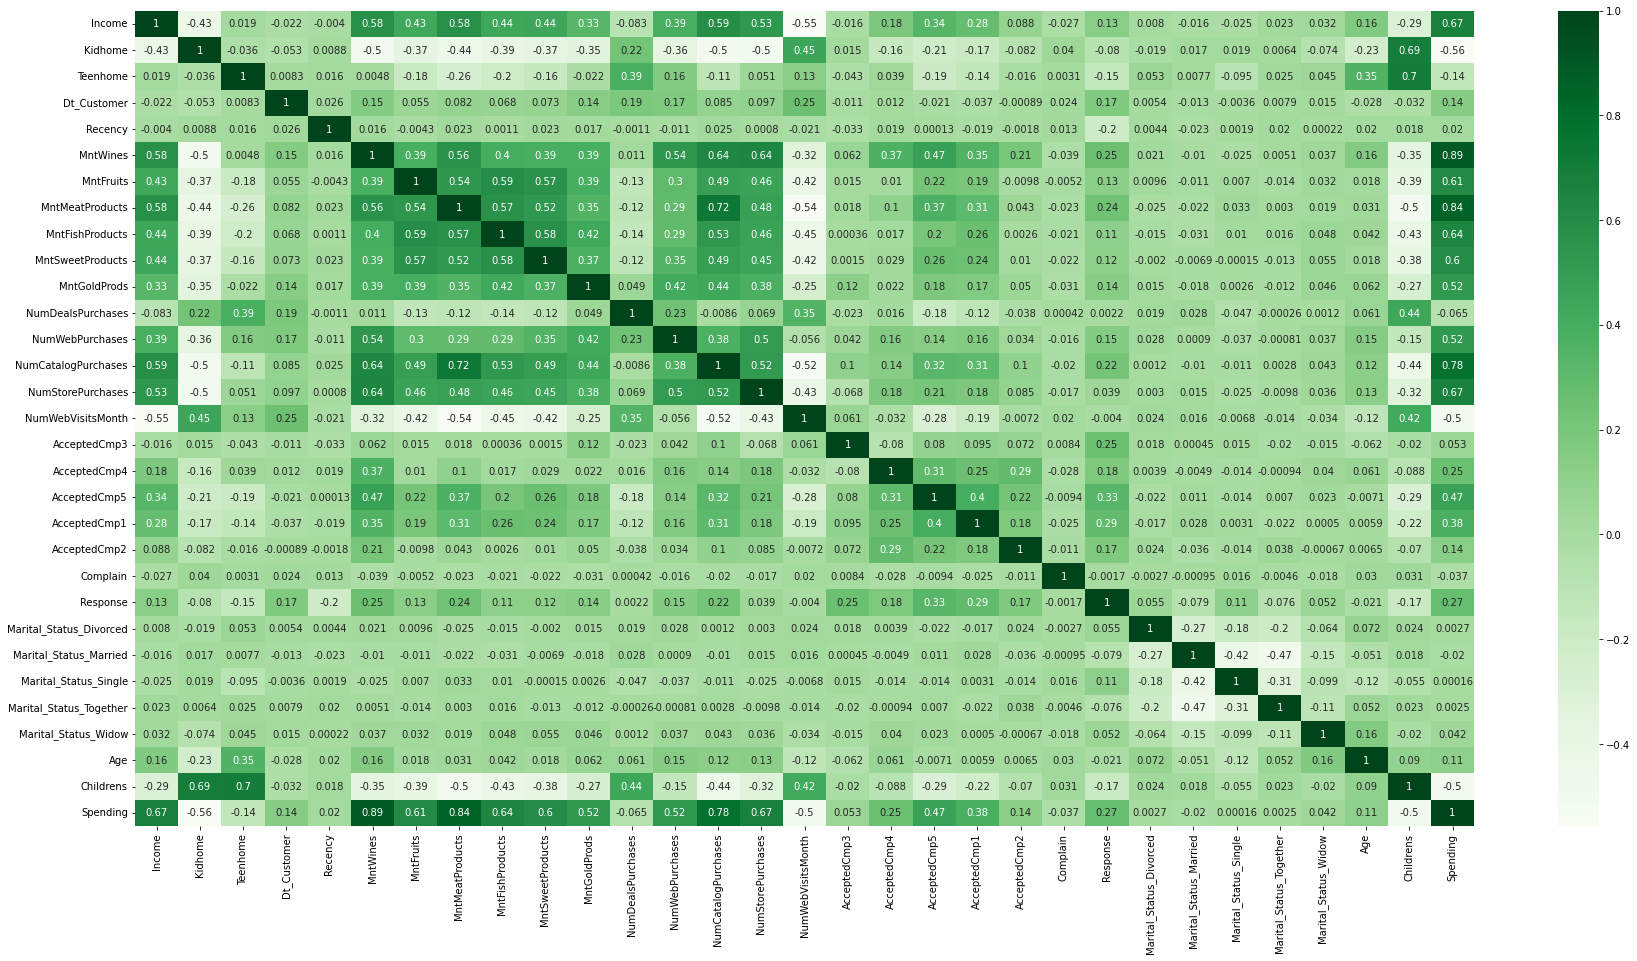

In [41]:
#Now we can use the heatmap, to find some correlation between the columns
plt.figure(figsize=(30, 15))
sns.heatmap(dataframe_final.corr(), annot=True, cmap='Greens')

This is an extremely interesting result. We can see that in fact there are many interesting correlations in our database, as we already suspected. First of all, we need to understand what these values mean. The correlation returns values from -1 to +1, where: the -1 value means a total negative correlation (when one value rises the other falls), and +1 is the positive correlation (when one value rises the other one rises together). As we can see, the diagonal have +1 value, because it's a correlation between the column and itself. Before we go deeper into the analysis, I'm going to take out some outliers that might impact our analysis.

### **Fifth question:**

**How do I remove outliers? Is this necessary?**

There are many ways to remove outliers from a database. In this case I'll use a simple way because I'm still learning new ways. It's very important remove some outliers because they can put your standar deviation and your mean up or down. With this kind of deviation, we may have some anomalies in the model, something we want to avoid.

In this case, I'll use a simple method, wich removes the first and the last quartiles of the analysis.
You can read more here:

https://www.thoughtco.com/what-are-first-and-third-quartiles-3126235

In [63]:
def limits(column):
    #I want to take the first quartile and the third quartile
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    amp = q3 - q1
    return q1 - 1.5*amp, q3 + 1.5*amp

def remove_outliers(dataframe, column):
    #Shape function returns the number of lines and columns, shape[0] is the number of lines
    qt_lines = dataframe.shape[0]
    
    #I need to know the upper limit and the lower limit
    low_limit, upp_limit = limits(dataframe[column])

    #I'll filter the dataframe so I'll use the loc function. I need the lines with the information greater than the lower bound and smaller then the upper bound.
    dataframe = dataframe.loc[(dataframe[column] >= low_limit) & (dataframe[column] <= upp_limit), :]

    #Return
    removed_lines = qt_lines - dataframe.shape[0]
    return dataframe, removed_lines


In [64]:
dataframe_final['Marital_Status'] = dataframe['Marital_Status']

In [65]:
dataframe_final, removed_lines = remove_outliers(dataframe_final, 'Income')
print('{} lines removed from Income' .format(removed_lines))

0 lines removed from Income


In [66]:
dataframe_final, removed_lines = remove_outliers(dataframe_final, 'Age')
print('{} lines removed from Age' .format(removed_lines))

0 lines removed from Age


<AxesSubplot:>

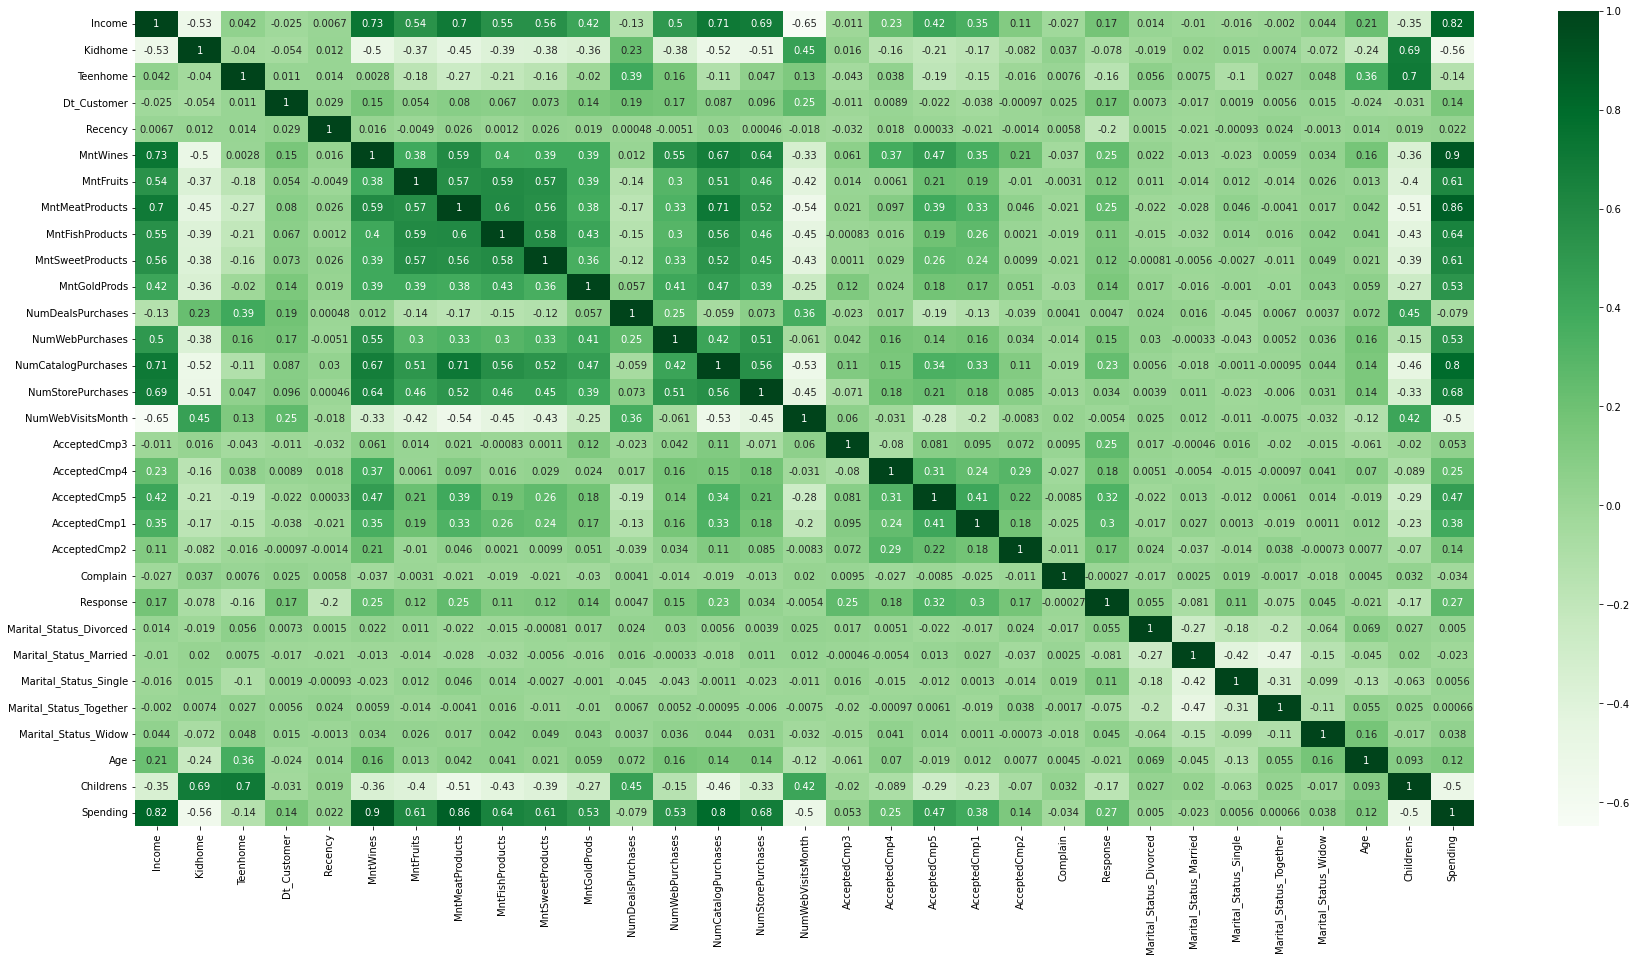

In [67]:
#Now we can use the heatmap, to find some correlation between the columns
plt.figure(figsize=(30, 15))
sns.heatmap(dataframe_final.corr(), annot=True, cmap='Greens')

There are not strong enough correlations to warrant in-depth analysis. Below, I will make some example graphs to show that values ​​below 0.9 give us little information.

<AxesSubplot:xlabel='Spending', ylabel='Income'>

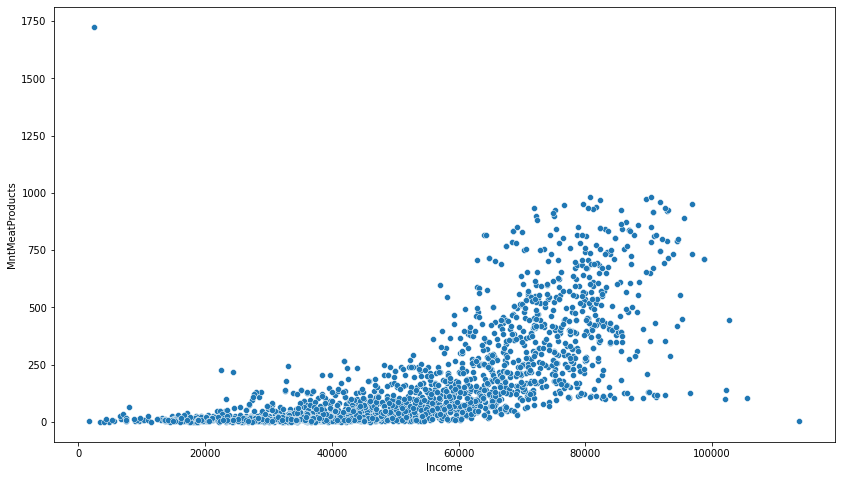

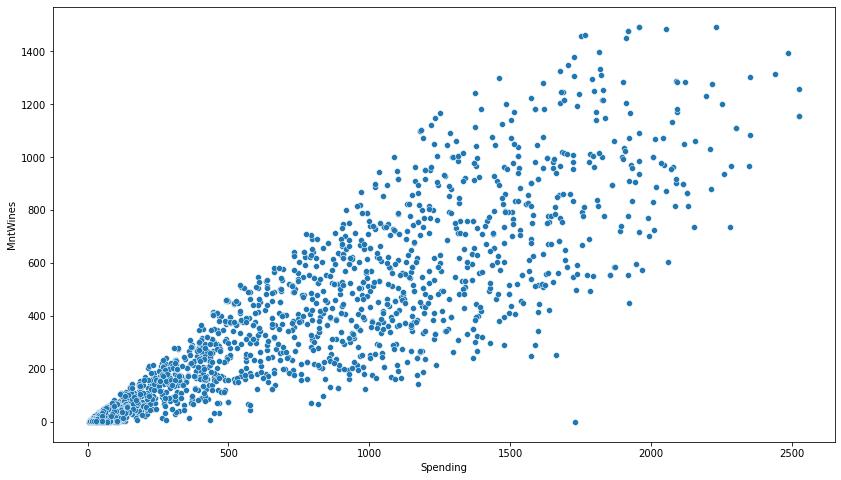

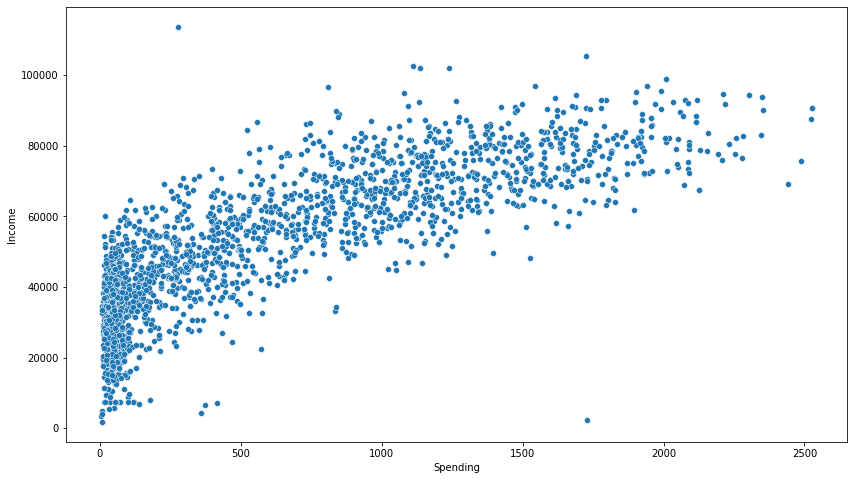

In [183]:
#MntMeatProducts x Income - 0.7 correlation
plt.figure(figsize = (14,8))
sns.scatterplot(data=dataframe_final, x="Income", y="MntMeatProducts")

#Spending x MntWines - 0.9 correlation
plt.figure(figsize = (14,8))
sns.scatterplot(data=dataframe_final, x="Spending", y="MntWines")

#Spendig x Income - 0.82 correlation
plt.figure(figsize = (14,8))
sns.scatterplot(data=dataframe_final, x="Spending", y="Income")

<AxesSubplot:xlabel='Age', ylabel='Count'>

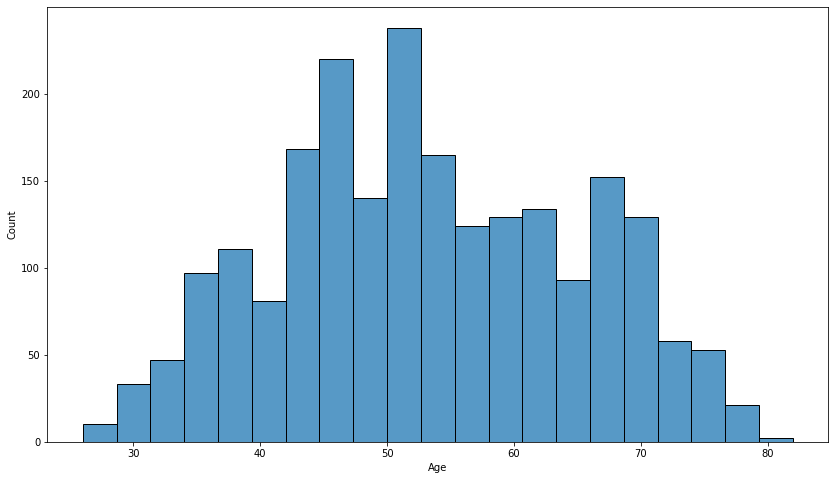

In [172]:
#Costumer's age distribution
plt.figure(figsize = (14,8))
sns.histplot(dataframe_final["Age"])

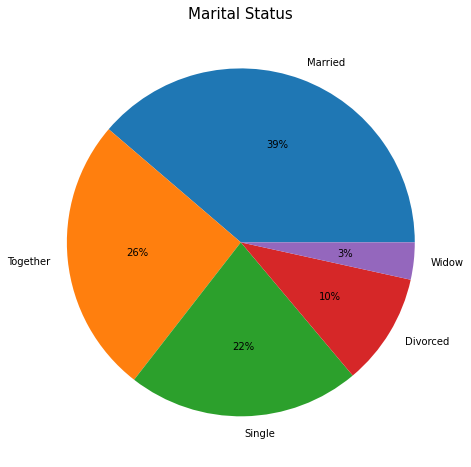

In [118]:
#Marital Status
fig = plt.figure(figsize = (14,8))
fig.patch.set_facecolor('White')
plt.pie(dataframe_final['Marital_Status'].value_counts(), labels = ["Married", "Together", "Single", "Divorced", "Widow"], autopct="%.0f%%")
plt.title('Marital Status', fontsize = 15)
plt.show()

In [ ]:
#Income by age group
income_39 = []
income_40_54 = []
income_55_69 = []
income_70 = []
print(dataframe_final.iloc[3, dataframe_final.columns == "Age"])

for i, income in enumerate(dataframe_final["Income"]):
    if dataframe_final.iloc[i, dataframe_final.columns == "Age"][0] <= 39:
        income_39.append(income)
    elif dataframe_final.iloc[i, dataframe_final.columns == "Age"][0] <= 54:
        income_40_54.append(income)
    elif dataframe_final.iloc[i, dataframe_final.columns == "Age"][0] <= 69:
        income_55_69.append(income)
    else:
        income_70.append(income)